In [47]:
import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Графіки за даними "Населення_України: Народжуваність"

In [133]:
response = requests.get(
    "https://uk.wikipedia.org/wiki/Населення_України#Народжуваність"
)
data = pd.read_html(response.text)

birth_rate_table = data[10]
birth_rate_table.replace('—', np.nan, inplace=True)
birth_rate_table['2014'] = birth_rate_table['2014'].apply(pd.to_numeric)
birth_rate_table['2019'] = birth_rate_table['2019'].apply(pd.to_numeric)
birth_rate_table = birth_rate_table.fillna({
    '1950': birth_rate_table_regions['1950'].mean(),
    '1960': birth_rate_table_regions['1960'].mean(),
    '1970': birth_rate_table_regions['1970'].mean(),
    '1990': birth_rate_table_regions['1990'].mean(),
    '2000': birth_rate_table_regions['2000'].mean(),
    '2012': birth_rate_table_regions['2012'].mean(),
    '2014': birth_rate_table_regions['2014'].mean(),
    '2019': birth_rate_table_regions['2019'].mean()})
birth_rate_table_regions = birth_rate_table.drop([27])

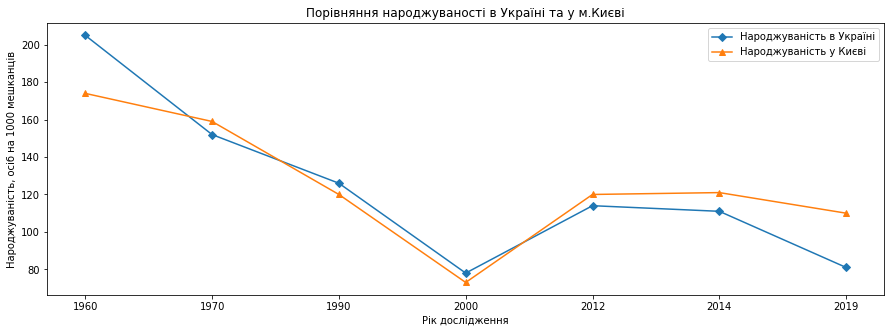

In [102]:
fig, axs = plt.subplots(figsize=(15,5))
axs.plot(birth_rate_table.iloc[27][2:], label='Народжуваність в Україні', marker="D")
axs.plot(birth_rate_table.iloc[25][2:], label='Народжуваність у Києві', marker="^")
plt.xlabel('Рік дослідження')
plt.ylabel('Народжуваність, осіб на 1000 мешканців')
plt.title('Порівняння народжуваності в Україні та у м.Києві')
plt.legend()
plt.show()

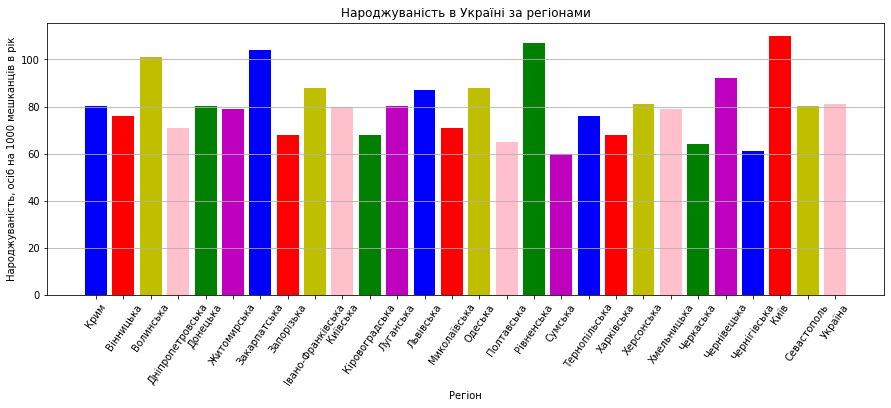

In [126]:
fig, axs = plt.subplots(figsize=(15,5))
axs.bar(birth_rate_table['Регіон'], birth_rate_table['2019'], color=["b", "r", "y", "pink", "g", "m"])
plt.xlabel('Регіон')
plt.ylabel('Народжуваність, осіб на 1000 мешканців в рік')
plt.title('Народжуваність в Україні за регіонами')
for tick in axs.get_xticklabels():
            tick.set_rotation(55)
plt.grid(axis='y')
plt.show()

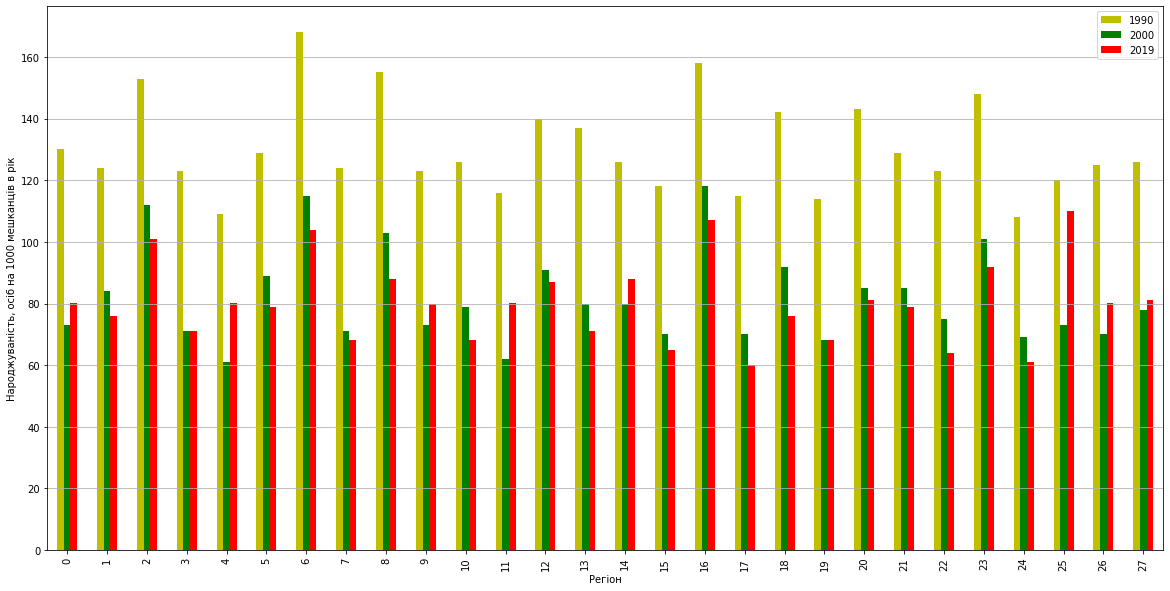

In [150]:
birth_rate_table[['Регіон', '1990', '2000', '2019']].plot.bar(color=["y", "g", "r"], figsize=(20,10))
plt.grid(axis='y')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність, осіб на 1000 мешканців в рік')
plt.show()

### Графіки за даними "ІТ спільнота"

In [134]:
data = pd.read_csv("2017_jun_final.csv")
python_data = data[data['Язык.программирования'] == 'Python']
salary_data = python_data.groupby("Должность").agg({"Зарплата.в.месяц": ['min', 'max']})
print(salary_data)

                         Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200


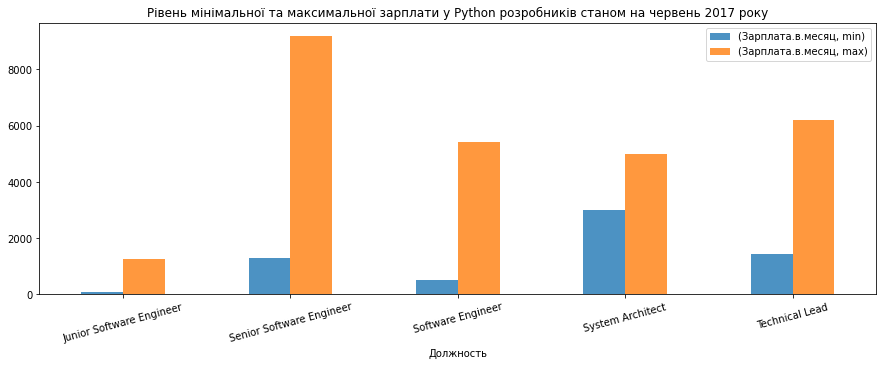

In [204]:
fig = salary_data.plot.bar(alpha=0.8, figsize=(15,5))
for tick in fig.get_xticklabels():
    tick.set_rotation(15)
plt.title('Рівень мінімальної та максимальної зарплати у Python розробників станом на червень 2017 року')
#fig.bar_label(fig)
# ax.bar_label(p1, label_type='center')
plt.legend()
plt.show()

TypeError: cannot unpack non-iterable AxesSubplot object

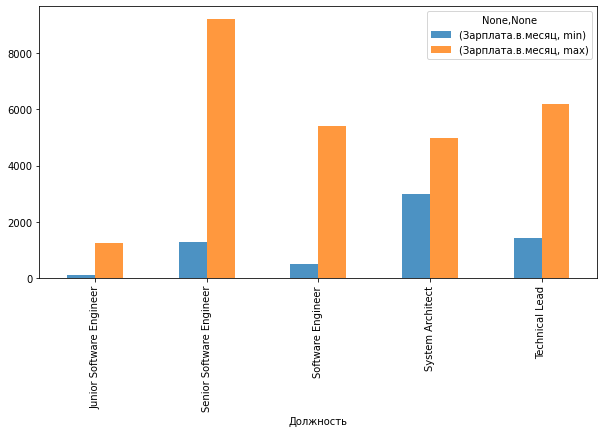

In [159]:
fig, axs = salary_data.plot.bar(alpha=0.8, figsize=(10,5))
plt.grid(axis='y')

for tick in axs.get_xticklabels(self):
            tick.set_rotation(55)
plt.show()